In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/02. Coding Dojo/Semana 03/01. Plataforma/Ejercicio de visualización de datos/Weekly Fuel Prices.xlsx'
df = pd.read_excel(filename)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          882 non-null    object 
 1   Petrol (USD)  881 non-null    float64
 2   Diesel (USD)  881 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.8+ KB


,Date,Petrol (USD),Diesel (USD)
878,2020-04-06 00:00:00,110.234797,116.833354
879,2020-04-13 00:00:00,109.265819,116.150812
880,2020-04-20 00:00:00,108.632747,115.732573
881,NaN,NaN,NaN
882,Return to Contents page,NaN,NaN


In [10]:
df = df.drop(df.index[-2:])

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df

,Date,Petrol (USD),Diesel (USD),Year,Month
0,2003-06-09,74.590284,76.773394,2003,6
1,2003-06-16,74.469143,76.689054,2003,6
2,2003-06-23,74.423566,76.620546,2003,6
3,2003-06-30,74.352421,76.505260,2003,6
4,2003-07-07,74.283737,76.457376,2003,7
...,...,...,...,...,...
876,2020-03-23,119.644504,123.409485,2020,3
877,2020-03-30,112.452709,118.597998,2020,3
878,2020-04-06,110.234797,116.833354,2020,4
879,2020-04-13,109.265819,116.150812,2020,4


In [27]:
gp1 = df.groupby(['Year'])[['Petrol (USD)','Diesel (USD)']].mean().reset_index()
gp1

,Year,Petrol (USD),Diesel (USD)
0,2003,75.591537,77.287333
1,2004,80.254930,81.894003
2,2005,86.796860,90.820266
3,2006,91.395871,95.179094
4,2007,94.495094,97.112432
5,2008,107.001178,117.556702
6,2009,99.593804,104.146614
7,2010,116.904146,119.234615
8,2011,133.412774,138.805382
9,2012,135.750055,142.163409


In [20]:
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-42-7d027ca74d45>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


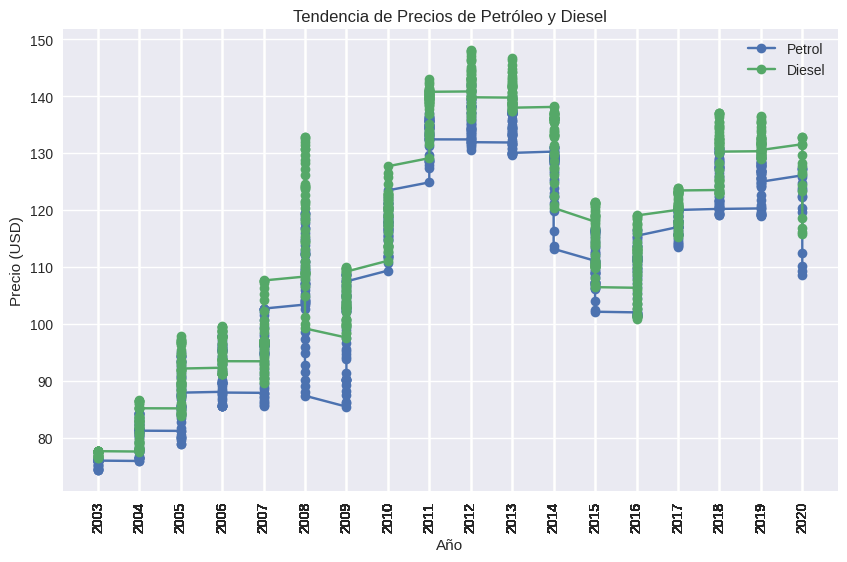

In [42]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
plt.plot(df['Year'], df['Petrol (USD)'], marker='o', label='Petrol')
plt.plot(df['Year'], df['Diesel (USD)'], marker='o', label='Diesel')
plt.title('Tendencia de Precios de Petróleo y Diesel')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')
plt.xticks(df['Year'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

*Gráfica que muestra el rango de precios durante el año y muestra los variable que fueron durante ese año*

<ipython-input-43-08df5127019f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


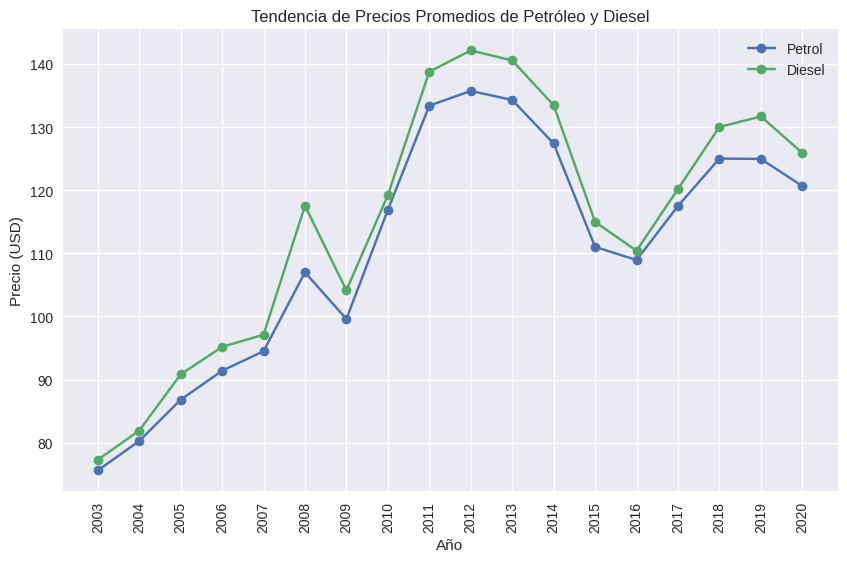

In [43]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
plt.plot(gp1['Year'], gp1['Petrol (USD)'], marker='o', label='Petrol')
plt.plot(gp1['Year'], gp1['Diesel (USD)'], marker='o', label='Diesel')
plt.title('Tendencia de Precios Promedios de Petróleo y Diesel')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')
plt.xticks(gp1['Year'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

*Tendencia del precio promedio del gas y el diesel desde el 2003, donde se observa que la tendencia tiende al alza*